## continous time business

In [1]:
import random as random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[(0, 100), (1, 100.23547156464801), (2, 100.60397662869711), (3, 99.59793686241014), (4, 100.55859627099781), (5, 101.56418223370778), (6, 100.54854041137071), (7, 101.06362449750513), (8, 100.05298825253008), (9, 99.86090079774726), (10, 98.86405453616878), (11, 99.85269508153047), (12, 99.02571516056253), (13, 98.23329273054065), (14, 98.33706057420703), (15, 98.71337249295954), (16, 98.28457786218578), (17, 97.3091402365957), (18, 98.28223163896165), (19, 99.01227414239139), (20, 100.00239688381531), (21, 101.00242085265346), (22, 102.01244506117999), (23, 102.58571912424073), (24, 102.42688910661367), (25, 103.45115799767981), (26, 103.0592907393668), (27, 102.02869783197313), (28, 101.0084108536534), (29, 101.8622234009138), (30, 101.54713655195059), (31, 101.52357092109109), (32, 102.37814210685237), (33, 103.39090215390543), (34, 102.75852301633181), (35, 101.73093778616848), (36, 102.74824716403016), (37, 102.2614023372846), (38, 101.97544300826794), (39, 100.95568857818526), (

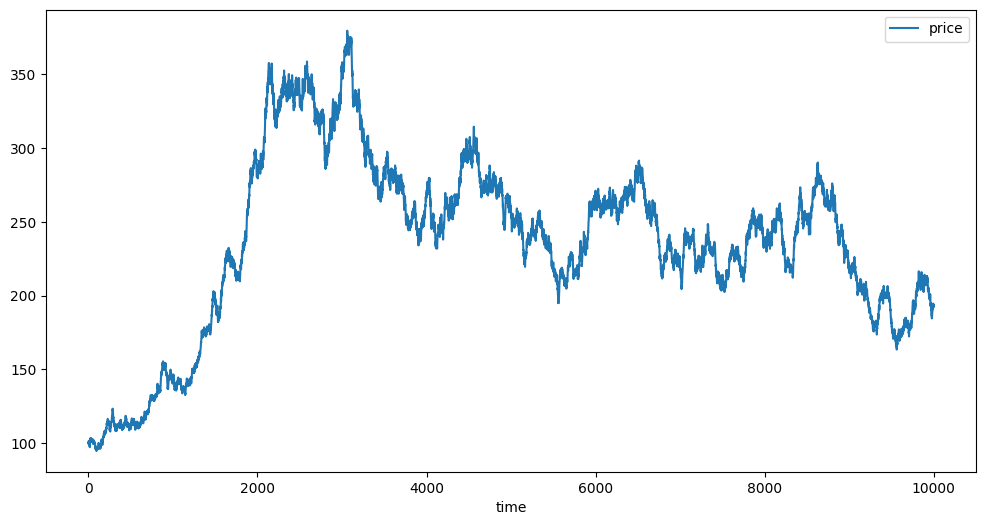

In [2]:
S0 = 100
prices = [(0, S0)]
S1 = S0

for t in range(1, 10001):
    shock = max(min(random.gauss(0, 1), 1), -1)/100
    S2 = S1*(1+(shock))
    prices.append((t, S2))
    S1 = S2

print(prices)

df = pd.DataFrame(prices, columns=["time", "price"])

df.plot(x="time", y="price", figsize=(12,6))
plt.show()


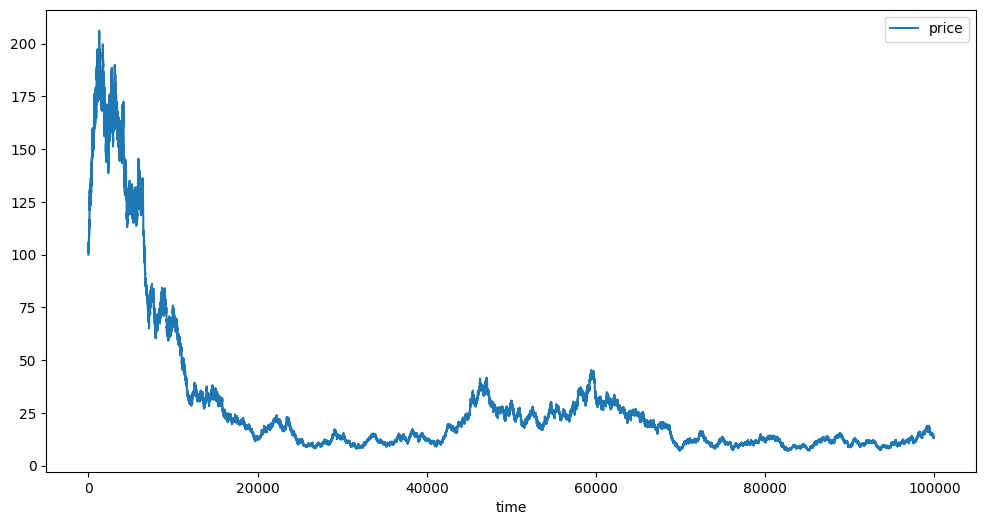

In [3]:
S0 = 100
S1 = S0
t = 0.0
lam = 1.0  # intensity of the trade arrival process

prices = [(t, S1)]

for _ in range(100001):

    # random time until next trade (exponential distribution)
    dt = random.expovariate(lam)
    t += dt

    # shock from a clipped normal distribution
    shock = max(min(random.gauss(0, 1), 1), -1) / 100

    # update price
    S1 = S1 * (1 + shock)

    prices.append((t, S1))

df = pd.DataFrame(prices, columns=["time", "price"])

df.plot(x="time", y="price", figsize=(12,6))
plt.show()


c:\Users\ofurn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


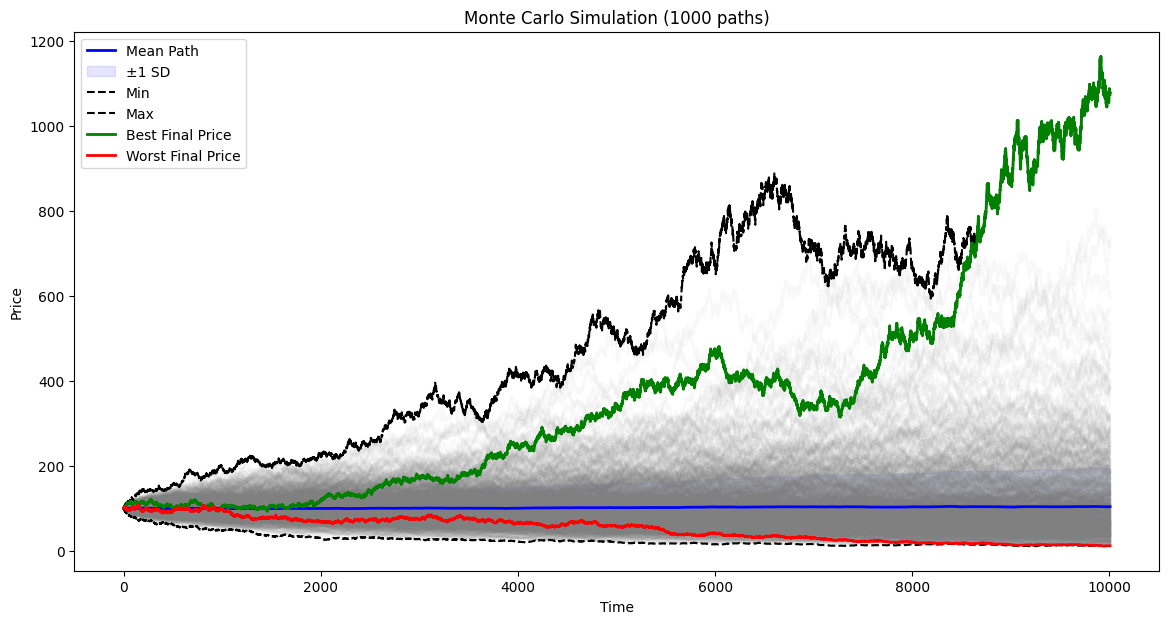

In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PARAMETERS
N_PATHS = 1000
N_STEPS = 10000
S0 = 100
lam = 1.0  # arrival rate of trades


def simulate_path():
    """Simulate one price path with random trade arrival times."""
    S = S0
    t = 0.0

    times = []
    prices = []

    for _ in range(N_STEPS):

        # dt from Exp(lam)
        dt = random.expovariate(lam)
        t += dt

        # shock from clipped normal
        shock = max(min(random.gauss(0, 1), 1), -1) / 100

        # price update
        S = S * (1 + shock)

        times.append(t)
        prices.append(S)

    return np.array(times), np.array(prices)


# ---- RUN SIMULATION ----

all_times = []
all_prices = []

for _ in range(N_PATHS):
    t, p = simulate_path()
    all_times.append(t)
    all_prices.append(p)

# Pad paths so they can be aligned by index
# (since times differ slightly)
max_len = max(len(p) for p in all_prices)

aligned_prices = np.full((N_PATHS, max_len), np.nan)
aligned_times = np.full((N_PATHS, max_len), np.nan)

for i in range(N_PATHS):
    aligned_prices[i, :len(all_prices[i])] = all_prices[i]
    aligned_times[i, :len(all_times[i])] = all_times[i]

# Use index as the alignment frame
t_plot = np.nanmean(aligned_times, axis=0)

# --- SUMMARY LINES ---
mean_path = np.nanmean(aligned_prices, axis=0)
std_path = np.nanstd(aligned_prices, axis=0)
min_path = np.nanmin(aligned_prices, axis=0)
max_path = np.nanmax(aligned_prices, axis=0)

# best/worst final price (last non-nan value)
final_vals = np.array([p[~np.isnan(p)][-1] for p in aligned_prices])
best_idx = np.argmax(final_vals)
worst_idx = np.argmin(final_vals)

# ---- PLOT ----
plt.figure(figsize=(14, 7))

# all paths
for i in range(N_PATHS):
    plt.plot(t_plot, aligned_prices[i], color="gray", alpha=0.05)

# mean path
plt.plot(t_plot, mean_path, color="blue", label="Mean Path", linewidth=2)

# ±1 std band
plt.fill_between(t_plot,
                 mean_path - std_path,
                 mean_path + std_path,
                 color="blue", alpha=0.1, label="±1 SD")

# min/max envelopes
plt.plot(t_plot, min_path, color="black", linestyle="--", label="Min")
plt.plot(t_plot, max_path, color="black", linestyle="--", label="Max")

# highlight best/worst paths
plt.plot(t_plot, aligned_prices[best_idx], color="green", linewidth=2, label="Best Final Price")
plt.plot(t_plot, aligned_prices[worst_idx], color="red", linewidth=2, label="Worst Final Price")

plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f"Monte Carlo Simulation ({N_PATHS} paths)")
plt.legend()
plt.show()


In [5]:
stats = pd.DataFrame({
    "final_price": final_vals,
    "total_return": final_vals / S0 - 1,
    "max_price": [np.nanmax(p) for p in aligned_prices],
    "min_price": [np.nanmin(p) for p in aligned_prices],
    "volatility": [np.nanstd(np.diff(p) / p[:-1]) for p in aligned_prices]
})

print(stats.describe())


       final_price  total_return    max_price    min_price   volatility
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000
mean    103.571052      0.035711   175.039428    54.766709     0.007183
std      90.645234      0.906452    99.227183    22.794077     0.000028
min      11.448574     -0.885514    99.000000    10.476899     0.007101
25%      48.196561     -0.518034   116.528065    35.847610     0.007164
50%      76.538512     -0.234615   143.190038    54.038864     0.007183
75%     131.157824      0.311578   196.137902    72.945954     0.007202
max    1074.837579      9.748376  1164.559736   100.406750     0.007260
